In [6]:
# need to find nulls
!pip install missingno

In [8]:
import missingno as msno
import pandas as pd

In [9]:
data = pd.read_csv('./sales-of-video-games/vgsales.csv')

In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:>

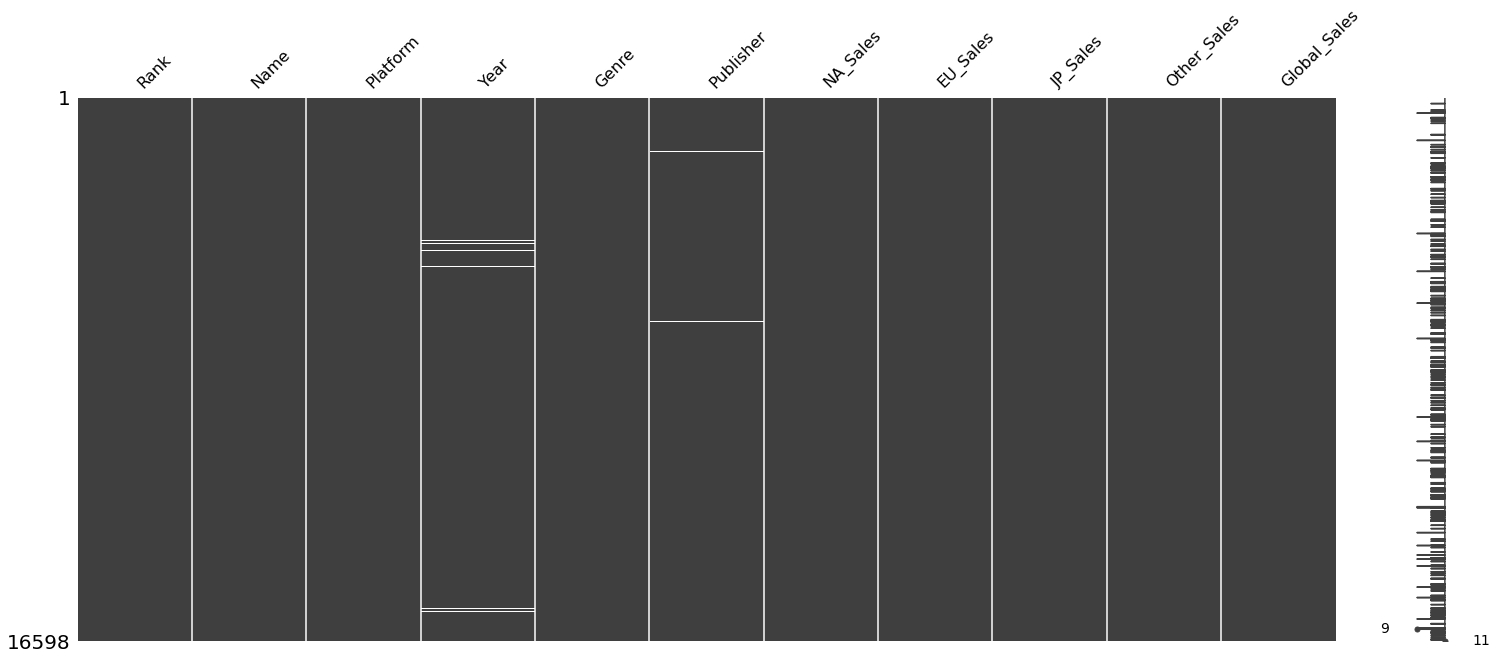

In [11]:
msno.matrix(data)

In [14]:
# dropna on Year and Publisher
data_filt = data.dropna(subset=['Year', 'Publisher']).reset_index(drop=True)
data_filt.shape

(16291, 11)

In [19]:
# let's take a look at what we have!
for c in data.columns:
    print(c, len(data[c].unique()), 'unique values')

Rank 16598 unique values
Name 11493 unique values
Platform 33 unique values
Year 41 unique values
Genre 14 unique values
Publisher 580 unique values
NA_Sales 409 unique values
EU_Sales 305 unique values
JP_Sales 244 unique values
Other_Sales 157 unique values
Global_Sales 624 unique values


In [20]:
# weird gameboy thing
data_weird = data[
    (data.Platform == 'GB') &
    (data.Year == 1993)
]
data_weird.shape

(0, 11)

In [28]:
# weird adventure year
data_filt[data_filt.Year == 'Adventure']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11387,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0.0,0.08,0.0,0.08,NaN
13301,13540,B's-LOG Party??PSP,2010,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04,NaN


In [29]:
# fix 

array(['2006', '1985', '2008', '2009', '1996', '1989', '1984', '2005',
       '1999', '2007', '2010', '2013', '2004', '1990', '1988', '2002',
       '2001', '2011', '1998', '2015', '2012', '2014', '1992', '1997',
       '1993', '1994', '1982', '2003', '1986', '2000', '1995', '2016',
       '1991', '1981', '1987', '1980', '1983', '2020', 'Adventure',
       '2017'], dtype=object)

In [23]:
data[data.Name == 'Grand Theft Auto V']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
197,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
1896,1898,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [31]:
sub = data.loc[data.Year == 'Adventure']
sub

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0.0,0.08,0.0,0.08,NaN
13538,13540,B's-LOG Party??PSP,2010,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04,NaN


In [32]:
tmp = sub.Platform
sub.Platform = sub.Year
sub.Year = tmp

/Users/kevin/.virtualenvs/859/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
sub

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,Adventure,Adventure,Sony Computer Entertainment,0,0.0,0.08,0.0,0.08,NaN
13538,13540,B's-LOG Party??PSP,Adventure,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04,NaN


In [33]:
data.loc[data.Year == 'Adventure']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0.0,0.08,0.0,0.08,NaN
13538,13540,B's-LOG Party??PSP,2010,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04,NaN


<AxesSubplot:>

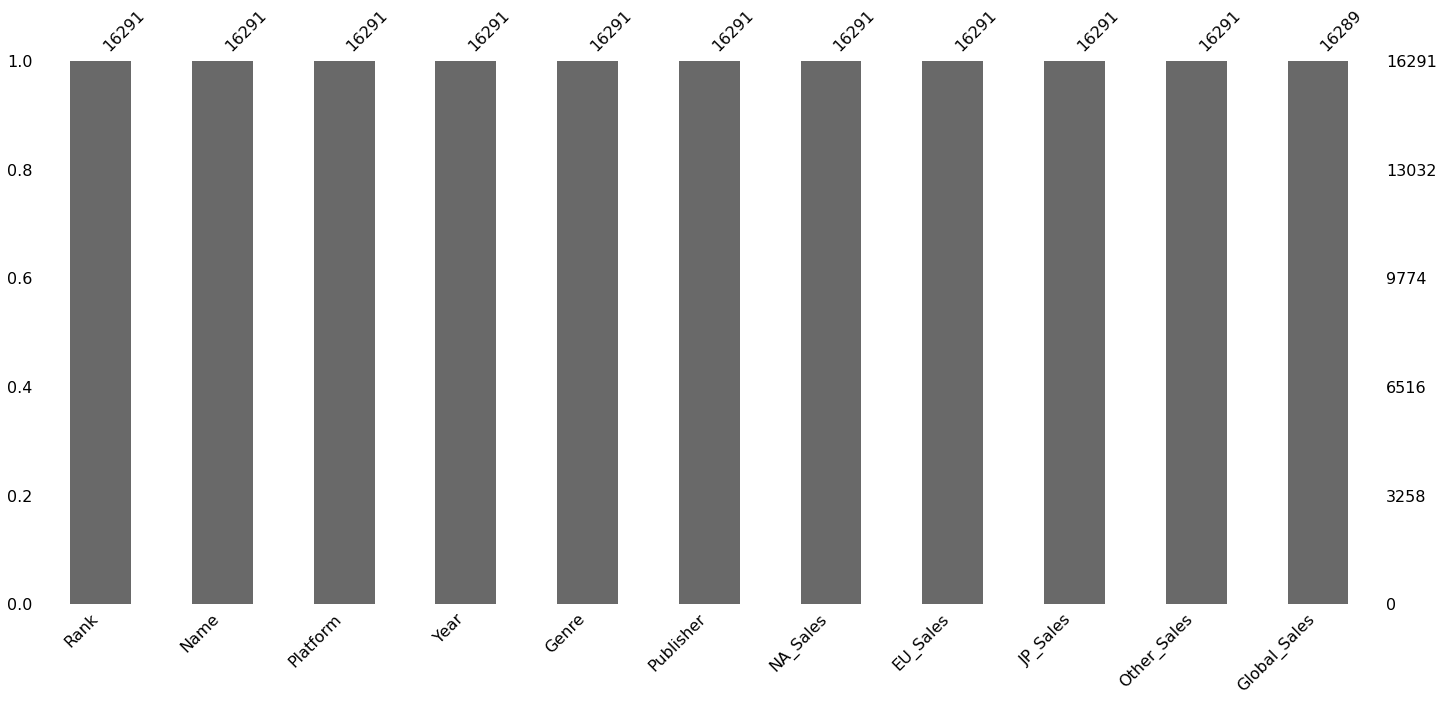

In [36]:
msno.bar(data_filt)

In [39]:
# also some null for Global Sales
# also takes care of case where year is adventure
data_filt = data.dropna(subset=['Year', 'Publisher', 'Global_Sales']).reset_index(drop=True)

<AxesSubplot:>

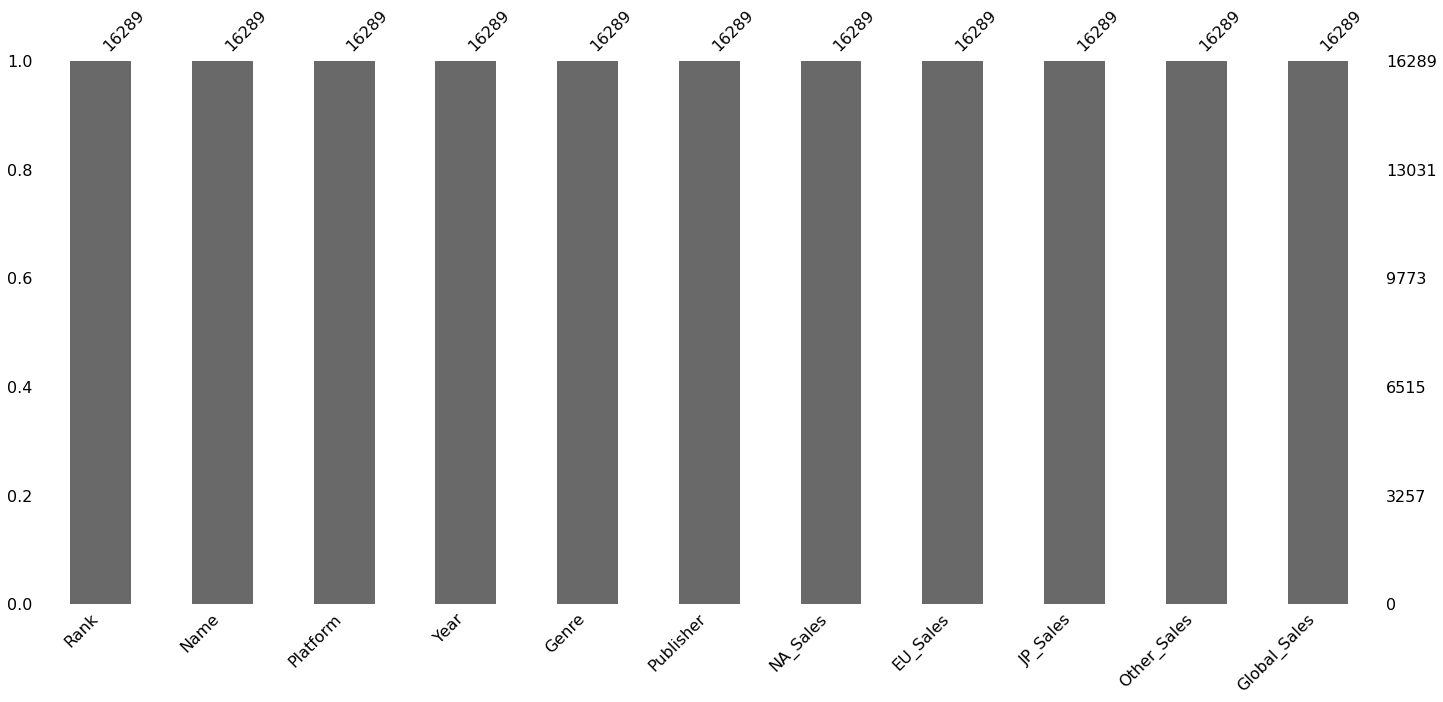

In [40]:
msno.bar(data_filt)

<AxesSubplot:>

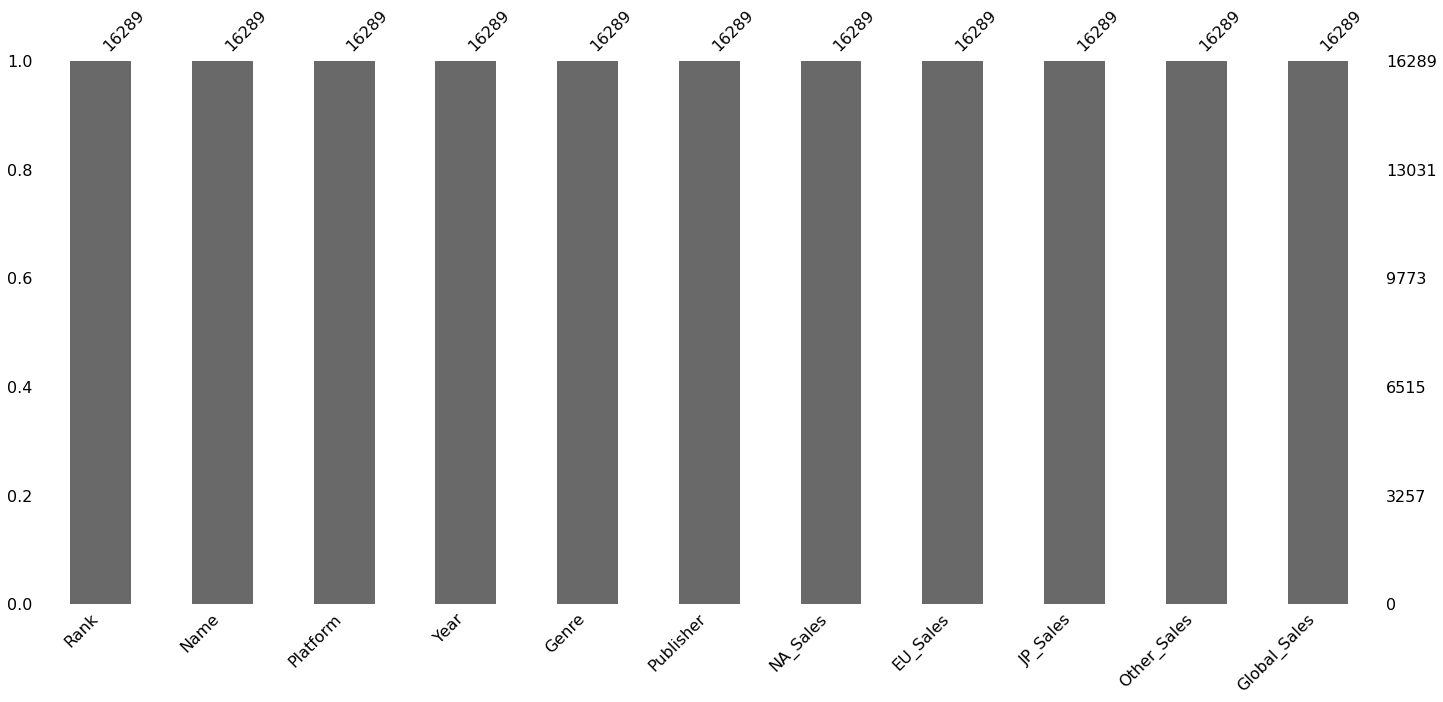

In [41]:
# also drop where year is adventure
data_filt = data_filt[
    data_filt.Year != 'Adventure'
]
msno.bar(data_filt)